In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("data.csv",encoding='ISO-8859-1')
data
ac=data.drop('Unnamed: 32',axis=1)
ac
ac.head()
x=ac.iloc[:,[2,3,16,18,24,26]]
y=ac.loc[:,['diagnosis']]
x


,radius_mean,texture_mean,smoothness_se,concavity_se,perimeter_worst,smoothness_worst
0,17.99,10.38,0.006399,0.05373,184.60,0.16220
1,20.57,17.77,0.005225,0.01860,158.80,0.12380
2,19.69,21.25,0.006150,0.03832,152.50,0.14440
3,11.42,20.38,0.009110,0.05661,98.87,0.20980
4,20.29,14.34,0.011490,0.05688,152.20,0.13740
...,...,...,...,...,...,...
564,21.56,22.39,0.010300,0.05198,166.10,0.14100
565,20.13,28.25,0.005769,0.03950,155.00,0.11660
566,16.60,28.08,0.005903,0.04730,126.70,0.11390
567,20.60,29.33,0.006522,0.07117,184.60,0.16500


In [18]:
ac.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#                                      Data Analysis


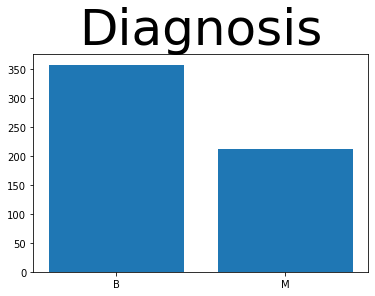

In [19]:
dc=ac['diagnosis'].value_counts()
dc
plt.bar(dc.index,dc.values)
plt.title('Diagnosis',size=50)

plt.show()

In [20]:
z=ac.groupby('radius_mean')['id'].count().sort_values(ascending=True)
z

radius_mean
6.981     1
15.320    1
15.300    1
15.280    1
15.270    1
         ..
11.710    3
11.600    3
12.890    3
13.000    3
12.340    4
Name: id, Length: 456, dtype: int64

In [21]:
print("mean: ",ac.radius_mean.mean())
print("variance: ",ac.radius_mean.var())
print("standart deviation (std): ",ac.radius_mean.std())
print("describe method: ",ac.radius_mean.describe())

mean:  14.127291739894552
variance:  12.418920129526722
standart deviation (std):  3.5240488262120775
describe method:  count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64


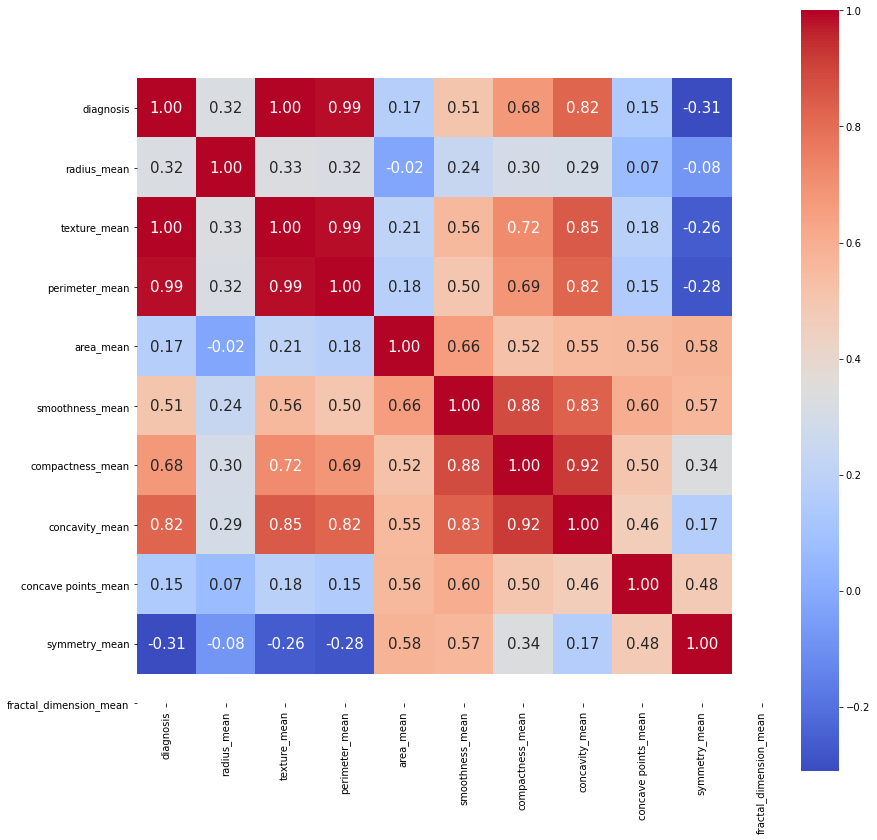

In [22]:
features_mean= list(ac.columns[1:12])
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

#                                        Machine Learning

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

c:\users\hs999\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [24]:
y=y.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_test.shape

(455, 6)
(455, 1)
(114, 6)
(114, 1)


(114, 6)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix
print(cm(y_test,pred))

c:\users\hs999\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9736842105263158
[[65  2]
 [ 1 46]]


In [26]:
import pickle
pickle.dump(rf, open('BreastCancer.pkl','wb'))